# Prediction using unsupervised ML (K - Means Clustering)


### By: Arijit Chatterjee

### Step 1: Importing and loading the dataset

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Load the iris dataset
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


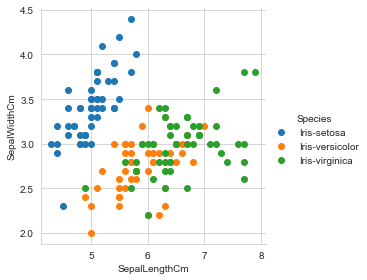

In [5]:
sns.set_style("whitegrid");
sns.FacetGrid(iris,hue="Species",size=4) \
    .map(plt.scatter,"SepalLengthCm","SepalWidthCm") \
    .add_legend()
plt.show()


### Step 2:Finding the optimum number of clusters for k-means classification

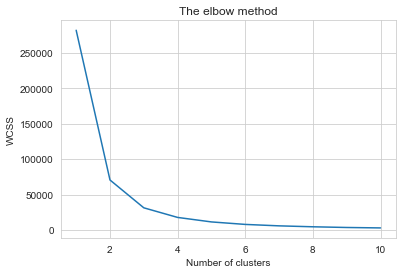

In [6]:
x = iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results 

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


### Step 3: Applying kmeans to the dataset

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Step 4: Visualization

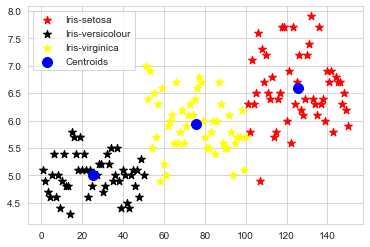

In [8]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=70,marker='*', color = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=70,marker='*', color = 'black', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=70,marker='*', color = 'yellow', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100,color = 'blue', label = 'Centroids')
plt.legend()

## 3D Scatter Plot

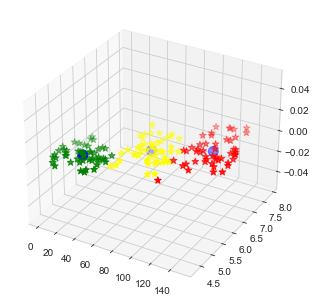

In [9]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=50,marker='*', color = 'red', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=50,marker='*', color = 'green', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=50,marker='*', color = 'yellow', label = 'Iris-virginica')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s=100,color = 'blue', label = 'Centroids')

plt.show()
